In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Country-data.csv')

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# First we do some EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


There are 167 rows and 10 columns

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Almost all columns seems to have a skewed distribution and possible outliers that could affect results adversely.

In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
len(df.drop_duplicates())

167

So the data is super clean and there seems no need for any cleaning

## Univariate Analysis

### Child Mortality

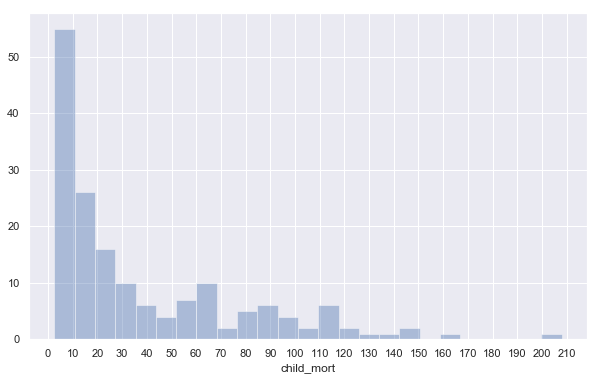

In [10]:
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(range(0,220,10))
sns.distplot(df['child_mort'],bins=25, kde=False)

This feature is highly skewed. Somec countries have very high child mortality.

### Exports Imports
We will look into exports and imports together as this gives Trade Balance.
<br>Trade Balance = Exports - Imports<br>
Higher is better for the country.

In [11]:
# Lets us do some feature engineering on the fly
df['trade_bal'] = df['exports'] - df['imports']

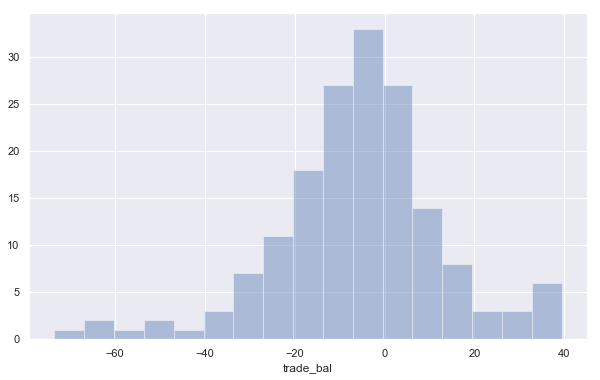

In [12]:
sns.distplot(df['trade_bal'], kde=False)

Trade balance has a right tail but still very close to normal distribution

### Health Spending as %age of Total GDP

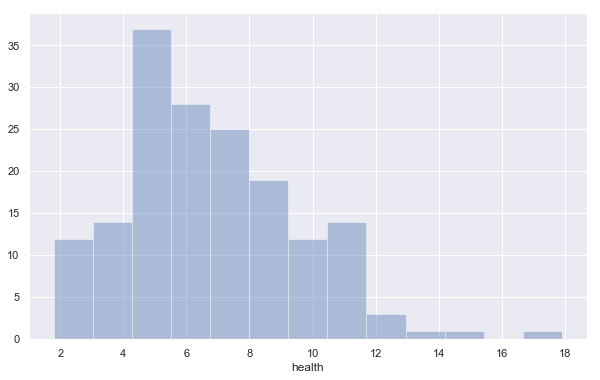

In [13]:
sns.distplot(df['health'], kde=False)

Some outliers here too

### Income
Net income per person

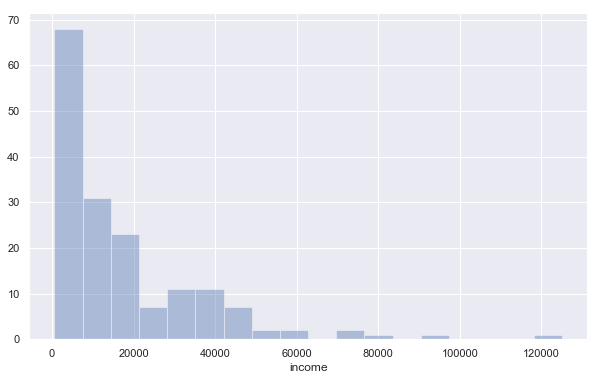

In [14]:
sns.distplot(df['income'], kde=False)

As expected, the most skewed feature is income always.

### Inflation

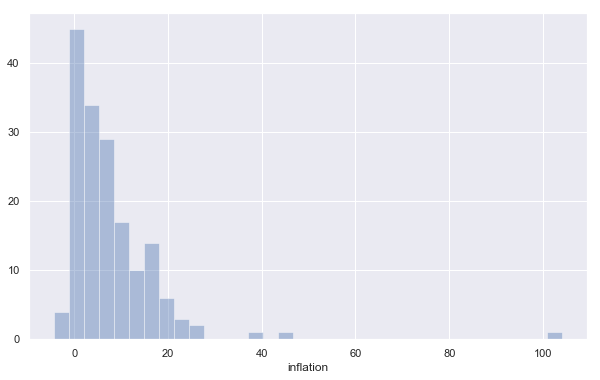

In [15]:
sns.distplot(df['inflation'], kde=False)

Here we have got some very high inflation values. Big Outliers.

### Life Expectancy

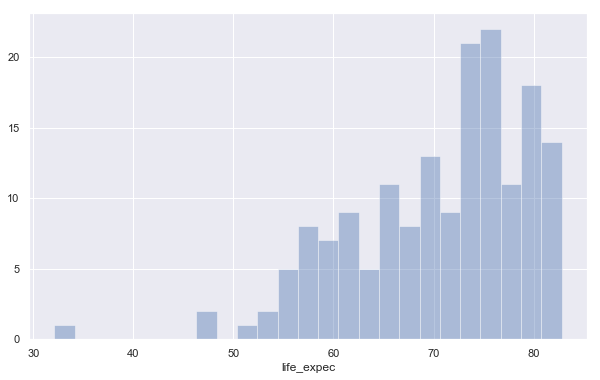

In [16]:
sns.distplot(df['life_expec'], kde=False, bins =25)

Some countries have very low life expectancy.

### Total Fertility

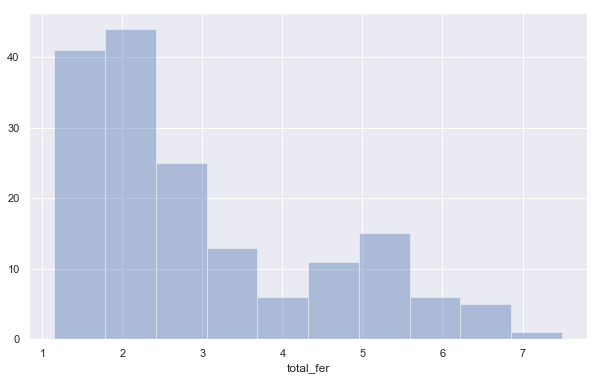

In [17]:
sns.distplot(df['total_fer'], kde=False, bins =10)

### GDP per capita

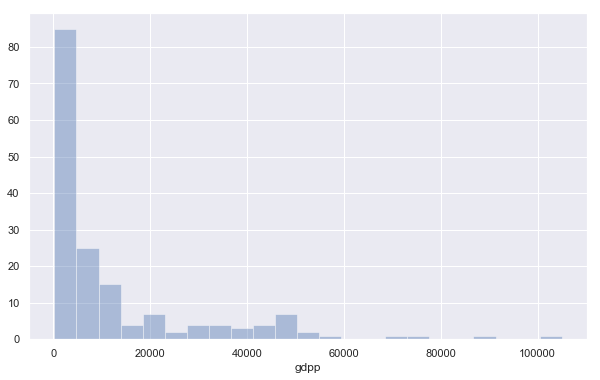

In [18]:
sns.distplot(df['gdpp'], kde=False)

This is highly skewed and some countires have very high GDP per Capita

# Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
# Saving a current dataset state to df1 before scaling
df1 = df.copy()

In [22]:
names = df.pop('country')

In [23]:
# Dropping exports and imports as We created Trade Balance
df.drop(labels=['exports', 'imports'], axis=1, inplace=True)

In [24]:
df.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal
0,90.2,7.58,1610,9.44,56.2,5.82,553,-34.9
1,16.6,6.55,9930,4.49,76.3,1.65,4090,-20.6
2,27.3,4.17,12900,16.10,76.5,2.89,4460,7.0
3,119.0,2.85,5900,22.40,60.1,6.16,3530,19.4
4,10.3,6.03,19100,1.44,76.8,2.13,12200,-13.4


In [25]:
df_norm = scaler.fit_transform(df)

In [26]:
pd.DataFrame(df_norm).describe()

,0,1,2,3,4,5,6,7
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,5.218713e-16,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17,3.456982e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.827827e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01,-3.585701e+00
25%,-7.466190e-01,-6.922106e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01,-4.801900e-01
50%,-4.717981e-01,-1.810007e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01,5.195650e-02
75%,5.926666e-01,6.515412e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02,5.099731e-01
max,4.221297e+00,4.047436e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00,2.392342e+00


We can see that our data has been standardised as mean for every column is almost zero here

# Principal Component Analysis

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(svd_solver='randomized', random_state=101)

In [29]:
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=101,
  svd_solver='randomized', tol=0.0, whiten=False)

In [30]:
pca.components_

array([[-4.30131249e-01,  1.39552158e-01,  4.14510468e-01,
        -1.66659513e-01,  4.46513577e-01, -4.08976519e-01,
         4.05993530e-01,  2.53872149e-01],
       [ 1.16273611e-01, -5.46499903e-01,  2.36081128e-01,
         4.94099875e-01, -3.57394830e-02,  1.43473072e-01,
         8.17892463e-02,  5.99498127e-01],
       [ 3.87050003e-01,  5.06474751e-01,  3.56366746e-01,
         4.18397007e-02, -2.34357526e-01,  3.83936397e-01,
         5.11160911e-01,  3.62176780e-02],
       [-1.81126000e-01,  4.35422020e-01, -1.42298059e-01,
         8.26997025e-01,  1.79999736e-01, -1.16639269e-01,
        -8.24570132e-02, -1.43612103e-01],
       [-6.54715481e-04, -4.52545376e-01,  3.62889533e-01,
         1.94477025e-01, -2.05292390e-02, -7.11469525e-02,
         2.76258324e-01, -7.37489069e-01],
       [ 1.92930940e-01,  8.24844787e-02,  1.09659883e-01,
         5.90198601e-02, -6.15679639e-01, -7.42456426e-01,
        -4.02595359e-02,  9.24204352e-02],
       [-6.82886213e-01,  8.046991

### Lets look at the Screeplot

In [31]:
pca.explained_variance_ratio_

array([0.50510474, 0.19337461, 0.12486591, 0.09065005, 0.03797833,
       0.02837732, 0.01120457, 0.00844445])

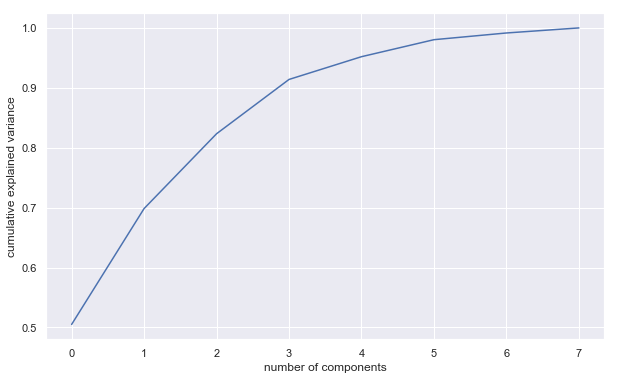

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like around 5 components are enough to explain 95% of the variance in the dataset.

#### Basis transformation - getting the data onto our PCs

In [33]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [34]:
df_train_pca = pca_final.fit_transform(df_norm)
df_train_pca.shape

(167, 5)

In [35]:
corrmat = np.corrcoef(df_train_pca.transpose())

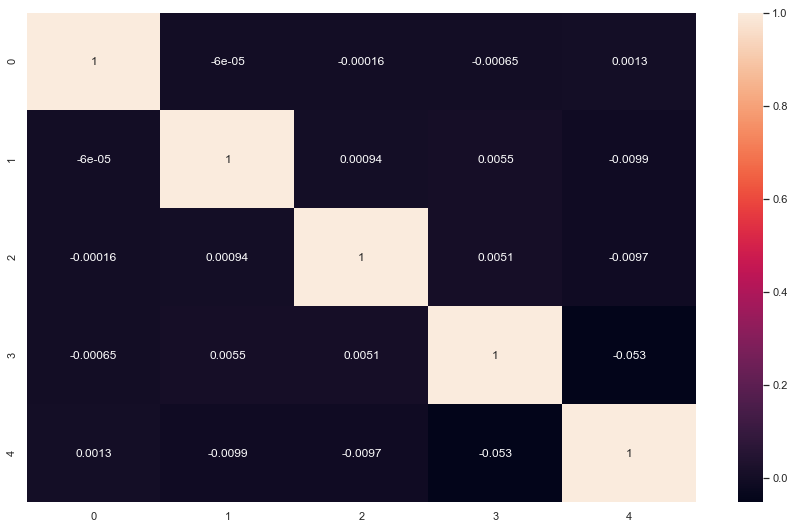

In [36]:
#plotting the correlation matrix
plt.figure(figsize = (15,9))
sns.heatmap(corrmat,annot = True)

In [37]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.005539252597995255 , min corr:  -0.05252902231850141


In [38]:
df_train_pca

array([[-3.04583977e+00, -7.66975737e-01,  1.06435676e+00,
        -1.08373205e-01, -5.10394204e-01],
       [ 3.59311437e-01, -9.10477134e-01, -1.17191803e+00,
         1.68573290e-01, -3.27275327e-01],
       [ 5.74669890e-02,  1.17442432e+00, -1.02626274e+00,
         3.88394786e-01,  1.59619697e-02],
       [-2.80742593e+00,  2.68295988e+00,  7.91108116e-01,
        -2.92454742e-01,  4.31531310e-01],
       [ 8.18286506e-01, -5.42576181e-01, -8.11119826e-01,
        -2.94183843e-01, -3.76856402e-01],
       [ 6.24464012e-01,  4.87950749e-01, -2.75224159e-01,
         1.44278742e+00,  2.11740871e-01],
       [-1.21366879e-01, -4.76738857e-01, -1.54613580e+00,
         3.26419704e-02, -7.88718745e-01],
       [ 2.86376859e+00, -3.14153853e-01,  9.91867948e-01,
        -1.51675033e-01, -5.22815222e-01],
       [ 3.03598723e+00, -6.78449774e-01,  1.21876957e+00,
         1.97025147e-01,  1.23659729e-01],
       [ 3.98314761e-01,  1.58864582e+00, -4.98833388e-01,
         1.79717572e-01

In [39]:
df_train_pca = pd.DataFrame(df_train_pca, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4','PC 5'])

In [40]:
df_train_pca.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,-3.045840,-0.766976,1.064357,-0.108373,-0.510394
1,0.359311,-0.910477,-1.171918,0.168573,-0.327275
2,0.057467,1.174424,-1.026263,0.388395,0.015962
3,-2.807426,2.682960,0.791108,-0.292455,0.431531
4,0.818287,-0.542576,-0.811120,-0.294184,-0.376856


# Clustering using KMeans and Hierarchical clustering

In [41]:
from scipy.cluster import hierarchy as hc

In [42]:
# Lets try with complete linkage
mergings = hc.linkage(df_train_pca, metric = 'euclidean', method='complete')

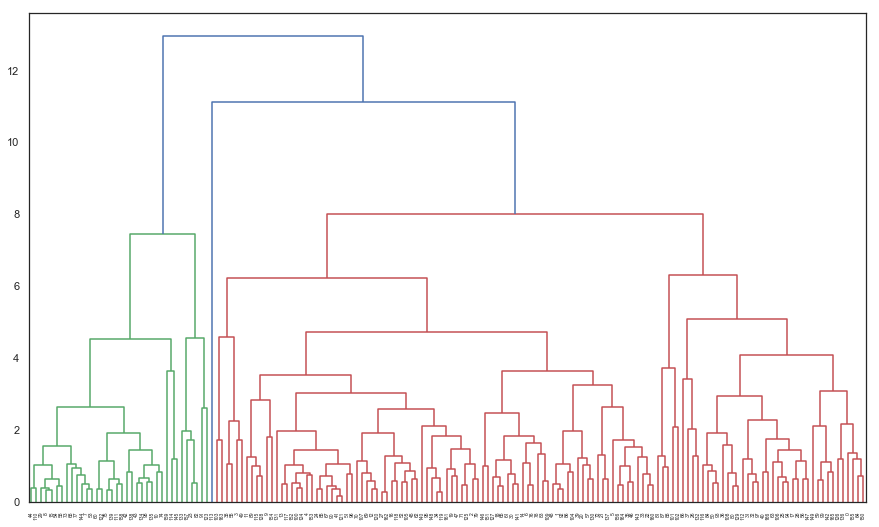

In [43]:
sns.set_style("white")
plt.figure(figsize=(15,9))
hc.dendrogram(mergings)
plt.show()

In [44]:
clustercut = pd.Series(hc.cut_tree(mergings, n_clusters = 5).reshape(-1,))

In [45]:
clustercut.value_counts()

1    88
0    42
2    30
3     6
4     1
dtype: int64

In [46]:
df_hc = pd.concat([df,pd.DataFrame({'cluster':clustercut})], axis=1)

In [47]:
df_hc.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal,cluster
0,90.2,7.58,1610,9.44,56.2,5.82,553,-34.9,0
1,16.6,6.55,9930,4.49,76.3,1.65,4090,-20.6,1
2,27.3,4.17,12900,16.10,76.5,2.89,4460,7.0,1
3,119.0,2.85,5900,22.40,60.1,6.16,3530,19.4,1
4,10.3,6.03,19100,1.44,76.8,2.13,12200,-13.4,1


In [48]:
avg = df_hc.groupby(by='cluster').mean()

In [49]:
w = 0.10 # width of each bar in bar plot
r1 = [1,2,3,4,5]        # r1, r2, r3, r4 are the positions of the bars.
r2 = [x-w for x in r1]
r3 = [x-2*w for x in r1]
r4 = [x+w for x in r1]

### Comapring all the Economic Factors

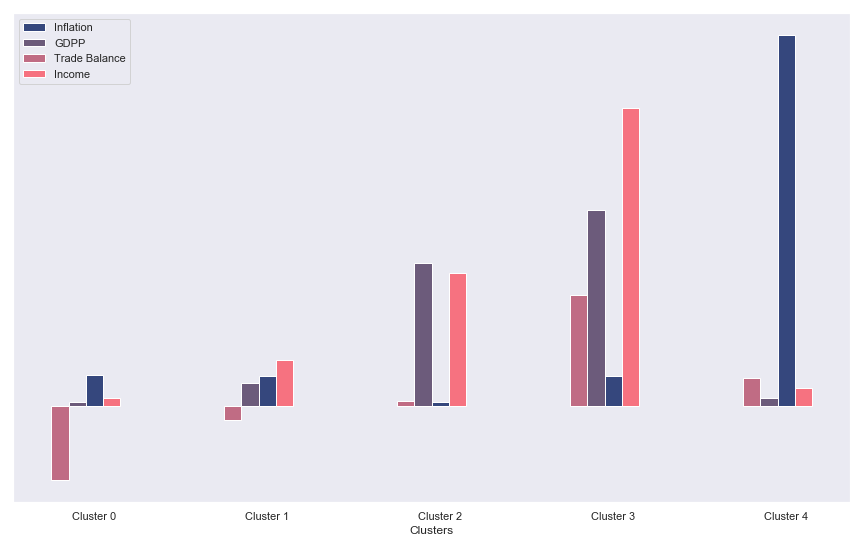

In [50]:
plt.figure(figsize=(15,9))
sns.set_style('dark')
plt.bar(r1, avg['inflation'] , color='#35477d', width=w,edgecolor='white', label='Inflation')
plt.bar(r2, avg['gdpp']/1000 , color='#6c5b7b', width=w, edgecolor='white', label='GDPP')
plt.bar(r3, avg['trade_bal'] , color='#c06c84', width=w,edgecolor='white', label='Trade Balance')
plt.bar(r4, avg['income']/1000 , color='#f67280', width=w, edgecolor='white', label='Income')

plt.xlabel('Clusters')
plt.xticks(np.arange(1,6), ['Cluster '+ str(x) for x in range(5)])
plt.yticks([]) # Removing yticks since all our parameters have different scale.

plt.legend()

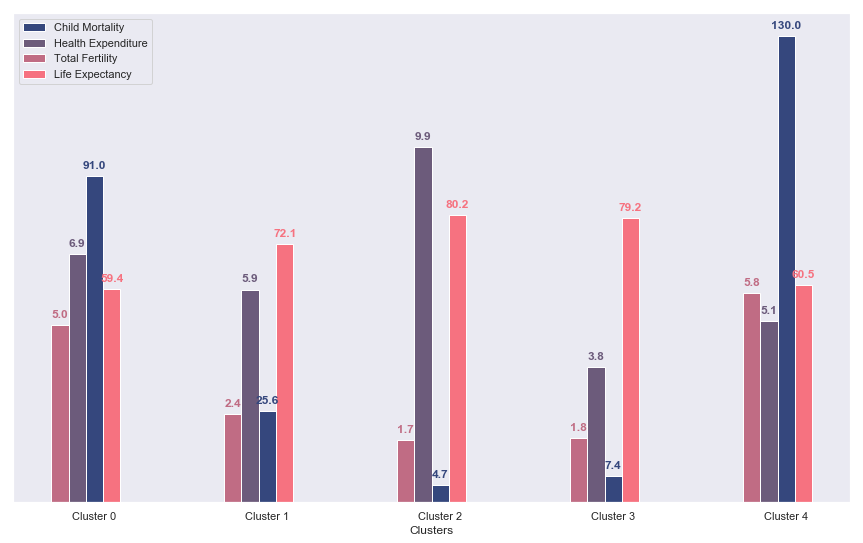

In [51]:
plt.figure(figsize=(15,9))
sns.set_style('dark')
plt.bar(r1, avg['child_mort'] , color='#35477d', width=w,edgecolor='white', label='Child Mortality')
plt.bar(r2, avg['health']*10, color='#6c5b7b', width=w, edgecolor='white', label='Health Expenditure')
plt.bar(r3, avg['total_fer']*10 , color='#c06c84', width=w,edgecolor='white', label='Total Fertility')
plt.bar(r4, avg['life_expec'] , color='#f67280', width=w, edgecolor='white', label='Life Expectancy')
plt.xlabel('Clusters')
plt.xticks(np.arange(1,6), ['Cluster '+ str(x) for x in range(5)])
plt.yticks([]) # Removing yticks since all our parameters have different scale.


for i,v in enumerate(avg['child_mort']):
    plt.text(r1[i], v + 2, '%.1f' % v, color='#35477d', fontweight='bold', horizontalalignment='center')
for i,v in enumerate(avg['health']):
    plt.text(r2[i], v*10 + 2, '%.1f' % v, color='#6c5b7b', fontweight='bold', horizontalalignment='center')
for i,v in enumerate(avg['total_fer']):
    plt.text(r3[i], v*10 + 2, '%.1f' % v, color='#c06c84', fontweight='bold', horizontalalignment='center')
for i,v in enumerate(avg['life_expec']):    
    plt.text(r4[i], v + 2, '%.1f' % v, color='#f67280', fontweight='bold', horizontalalignment='center')
plt.legend()

# KMeans Clustering

### Silhouette Score

In [52]:
sns.set_style("darkgrid")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,max_iter=100,random_state=12).fit(df_train_pca)
    sse_.append([k,silhouette_score(df_train_pca, kmeans.labels_)])

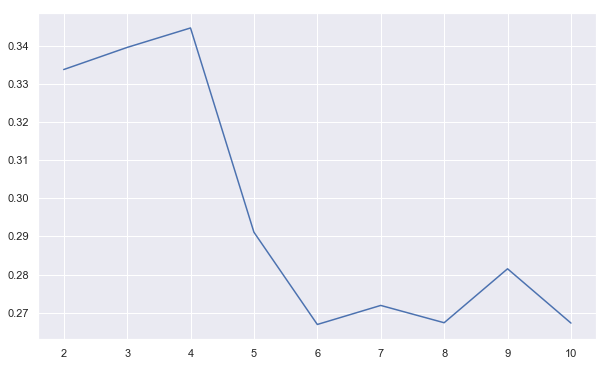

In [53]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

Silhoutte score suggests 6 is the optimum number of clusters to have.

### Sum of Squared Distances

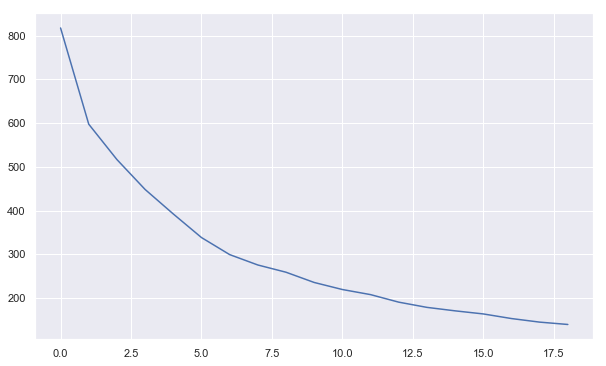

In [54]:
ssd =[]
for num_clusters in list(range(2,21)):
    kmeans_model = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans_model.fit(df_train_pca)
    ssd.append(kmeans_model.inertia_)

plt.plot(ssd)

Here the sharp decline ends between 5 and 7.5, after that decline is linear. So the optimum number of clusters according to SSD is K = 6.

### KMeans with K=6

In [55]:
kmeans_model_k6 = KMeans(n_clusters=6, max_iter=100,random_state=100)
kmeans_model_k6.fit(df_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [56]:
df_kmeans_k6 = pd.concat([df, pd.DataFrame({'cluster':kmeans_model_k6.labels_})], axis=1)

In [57]:
df_kmeans_k6.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal,cluster
0,90.2,7.58,1610,9.44,56.2,5.82,553,-34.9,3
1,16.6,6.55,9930,4.49,76.3,1.65,4090,-20.6,4
2,27.3,4.17,12900,16.10,76.5,2.89,4460,7.0,4
3,119.0,2.85,5900,22.40,60.1,6.16,3530,19.4,3
4,10.3,6.03,19100,1.44,76.8,2.13,12200,-13.4,4


In [58]:
df_kmeans_k6.cluster.value_counts()

4    80
3    40
0    29
1    10
5     7
2     1
Name: cluster, dtype: int64

In [59]:
avg = df_kmeans_k6.groupby(by='cluster').mean()

In [60]:
avg

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal
cluster,,,,,,,,
0,4.741379,9.925862,36603.448276,1.083724,80.210345,1.726897,38572.413793,1.210345
1,56.400000,10.180000,2304.400000,6.394000,62.660000,3.932000,1384.900000,-47.028000
2,130.000000,5.070000,5150.000000,104.000000,60.500000,5.840000,2330.000000,7.900000
3,94.835000,5.762000,4012.975000,10.456875,59.095000,5.051250,1993.525000,-9.557750
4,21.481250,6.010875,13105.625000,7.812738,73.118750,2.278750,6649.925000,-4.429711
5,6.814286,4.592857,80642.857143,8.129143,79.471429,1.817143,59785.714286,28.357143


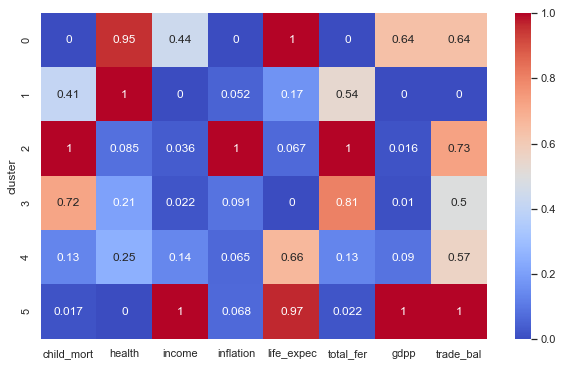

In [61]:
# We will use standardised values for heat map
sns.heatmap(avg.apply(lambda x: (x - x.min())/ (x.max()- x.min())), cmap="coolwarm",annot=True)

### KMeans with K=6 with a different random_state
If we get completely different results then probably our clusters are not stable.

In [62]:
kmeans_model_k6_1 = KMeans(n_clusters=6, max_iter=100, random_state=42)
kmeans_model_k6_1.fit(df_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [63]:
df_kmeans_k6_1 = pd.concat([df, pd.DataFrame({'cluster':kmeans_model_k6_1.labels_})], axis=1)

In [64]:
df_kmeans_k6_1.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal,cluster
0,90.2,7.58,1610,9.44,56.2,5.82,553,-34.9,2
1,16.6,6.55,9930,4.49,76.3,1.65,4090,-20.6,0
2,27.3,4.17,12900,16.10,76.5,2.89,4460,7.0,1
3,119.0,2.85,5900,22.40,60.1,6.16,3530,19.4,2
4,10.3,6.03,19100,1.44,76.8,2.13,12200,-13.4,0


In [65]:
df_kmeans_k6_1.cluster.value_counts()

0    61
2    42
1    29
3    27
5     7
4     1
Name: cluster, dtype: int64

The clusters did change and they are getting affected by random initial values

In [66]:
avg = df_kmeans_k6_1.groupby(by='cluster').mean()

In [67]:
avg

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal
cluster,,,,,,,,
0,18.800000,6.865574,11581.475410,4.623131,73.565574,2.182295,6680.426230,-12.500328
1,34.979310,4.528276,15972.068966,15.861379,70.262069,2.880345,7164.344828,10.387693
2,93.702381,6.659762,2629.833333,8.698452,58.669048,5.007381,1307.428571,-17.997381
3,4.322222,10.043333,37533.333333,1.160593,80.622222,1.732963,39777.777778,1.677778
4,130.000000,5.070000,5150.000000,104.000000,60.500000,5.840000,2330.000000,7.900000
5,6.814286,4.592857,80642.857143,8.129143,79.471429,1.817143,59785.714286,28.357143


### KMeans with K=5

In [68]:
kmeans_model_k5 = KMeans(n_clusters=5, max_iter=100, random_state=100)
kmeans_model_k5.fit(df_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [69]:
df_kmeans_k5 = pd.concat([df, pd.DataFrame({'cluster':kmeans_model_k5.labels_})], axis=1)

In [70]:
df_kmeans_k5.head()

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal,cluster
0,90.2,7.58,1610,9.44,56.2,5.82,553,-34.9,2
1,16.6,6.55,9930,4.49,76.3,1.65,4090,-20.6,3
2,27.3,4.17,12900,16.10,76.5,2.89,4460,7.0,1
3,119.0,2.85,5900,22.40,60.1,6.16,3530,19.4,2
4,10.3,6.03,19100,1.44,76.8,2.13,12200,-13.4,3


In [71]:
df_kmeans_k5.cluster.value_counts()

3    56
1    48
2    36
0    26
4     1
Name: cluster, dtype: int64

In [72]:
avg = df_kmeans_k5.groupby(by='cluster').mean()

In [73]:
avg

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal
cluster,,,,,,,,
0,5.034615,9.059615,51646.153846,3.021962,80.546154,1.789231,49819.230769,9.938462
1,39.991667,5.051667,7272.083333,10.706896,68.431250,3.066875,3359.187500,-6.822644
2,98.866667,7.054722,2727.861111,8.939306,58.347222,5.251389,1415.083333,-19.955000
3,11.632143,7.163393,19070.535714,5.022304,75.766071,1.851607,11700.000000,-3.319643
4,130.000000,5.070000,5150.000000,104.000000,60.500000,5.840000,2330.000000,7.900000


### KMeans with K=5 with a different random_state

In [74]:
kmeans_model_k5_1 = KMeans(n_clusters=5, max_iter=100, random_state=42)
kmeans_model_k5_1.fit(df_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [75]:
df_kmeans_k5_1 = pd.concat([names,df, pd.DataFrame({'cluster':kmeans_model_k5_1.labels_})], axis=1)

In [76]:
df_kmeans_k5_1.head()

,country,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal,cluster
0,Afghanistan,90.2,7.58,1610,9.44,56.2,5.82,553,-34.9,4
1,Albania,16.6,6.55,9930,4.49,76.3,1.65,4090,-20.6,2
2,Algeria,27.3,4.17,12900,16.10,76.5,2.89,4460,7.0,2
3,Angola,119.0,2.85,5900,22.40,60.1,6.16,3530,19.4,1
4,Antigua and Barbuda,10.3,6.03,19100,1.44,76.8,2.13,12200,-13.4,2


In [77]:
df_kmeans_k5_1.cluster.value_counts()

2    80
4    42
3    29
1     9
0     7
Name: cluster, dtype: int64

In [78]:
avg = df_kmeans_k5_1.groupby(by='cluster').mean()

In [79]:
avg

,child_mort,health,income,inflation,life_expec,total_fer,gdpp,trade_bal
cluster,,,,,,,,
0,6.814286,4.592857,80642.857143,8.129143,79.471429,1.817143,59785.714286,28.357143
1,73.755556,4.467778,10822.222222,35.211111,64.466667,4.544444,5932.222222,13.600000
2,21.373750,6.091125,12914.125000,6.933738,73.093750,2.279625,6512.800000,-5.530961
3,4.741379,9.925862,36603.448276,1.083724,80.210345,1.726897,38572.413793,1.210345
4,91.242857,6.921905,2538.880952,8.086548,58.873810,4.910476,1273.809524,-20.928333


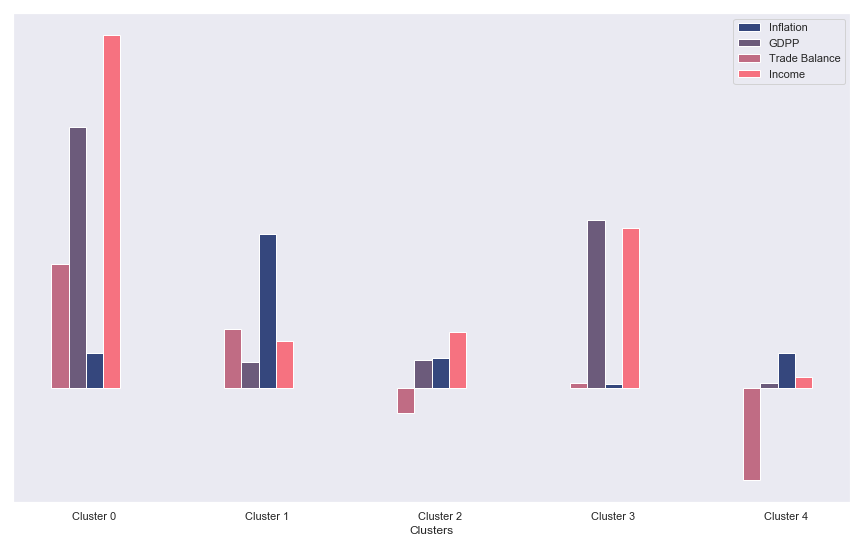

In [80]:
# Comparing cluster on the basis of economic parameters
plt.figure(figsize=(15,9))
sns.set_style('dark')
plt.bar(r1, avg['inflation'] , color='#35477d', width=w,edgecolor='white', label='Inflation')
plt.bar(r2, avg['gdpp']/1000 , color='#6c5b7b', width=w, edgecolor='white', label='GDPP')
plt.bar(r3, avg['trade_bal'] , color='#c06c84', width=w,edgecolor='white', label='Trade Balance')
plt.bar(r4, avg['income']/1000 , color='#f67280', width=w, edgecolor='white', label='Income')

plt.xlabel('Clusters')
plt.xticks(np.arange(1,6), ['Cluster '+ str(x) for x in range(5)])
plt.yticks([]) # Removing yticks since all our parameters have different scale.

plt.legend()

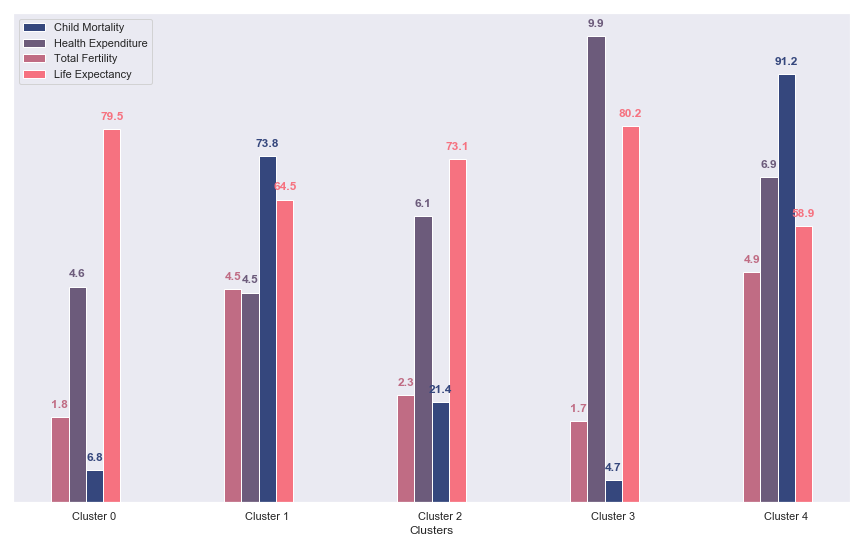

In [87]:
# Comparing cluster on the basis of health parameters
plt.figure(figsize=(15,9))
sns.set_style('dark')
plt.bar(r1, avg['child_mort'] , color='#35477d', width=w,edgecolor='white', label='Child Mortality')
plt.bar(r2, avg['health']*10, color='#6c5b7b', width=w, edgecolor='white', label='Health Expenditure')
plt.bar(r3, avg['total_fer']*10 , color='#c06c84', width=w,edgecolor='white', label='Total Fertility')
plt.bar(r4, avg['life_expec'] , color='#f67280', width=w, edgecolor='white', label='Life Expectancy')
plt.xlabel('Clusters')
plt.xticks(np.arange(1,6), ['Cluster '+ str(x) for x in range(5)])
plt.yticks([]) # Removing yticks since all our parameters have different scale.


for i,v in enumerate(avg['child_mort']):
    plt.text(r1[i], v + 2, '%.1f' % v, color='#35477d', fontweight='bold', horizontalalignment='center')
for i,v in enumerate(avg['health']):
    plt.text(r2[i], v*10 + 2, '%.1f' % v, color='#6c5b7b', fontweight='bold', horizontalalignment='center')
for i,v in enumerate(avg['total_fer']):
    plt.text(r3[i], v*10 + 2, '%.1f' % v, color='#c06c84', fontweight='bold', horizontalalignment='center')
for i,v in enumerate(avg['life_expec']):    
    plt.text(r4[i], v + 2, '%.1f' % v, color='#f67280', fontweight='bold', horizontalalignment='center')
plt.legend()

#### Cluster 0
High Per capita income, low inflation, highest gdpp and highest trade balance. - Economically Very Well
Second highest life expectancy, Health expenditure is fine, low child mortality, total fertility is low - Good Health wise

In [88]:
print(df_kmeans_k5_1.loc[ df_kmeans_k5_1['cluster']==0, 'country'])

23                   Brunei
82                   Kuwait
91               Luxembourg
114                  Norway
123                   Qatar
133               Singapore
157    United Arab Emirates
Name: country, dtype: object


#### Cluster 1
Cluster 1 has high inflation and other factors are moderate - Economically not so well
Second highest child mortality and second lowest life expectency, other factors are also moderate - Health wise needs attention.

In [83]:
df_kmeans_k5_1.loc[ df_kmeans_k5_1['cluster']==1, 'country']

3                 Angola
38           Congo, Rep.
49     Equatorial Guinea
55                 Gabon
103             Mongolia
113              Nigeria
142                Sudan
163            Venezuela
165                Yemen
Name: country, dtype: object

#### Cluster 2
Second worst scenario economically as cluster 4 needs more help.
Helath wise also it is second worse scenario.

In [84]:
df_kmeans_k5_1.loc[ df_kmeans_k5_1['cluster']==2, 'country']

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48          

#### Cluster 3
This cluster is second best economically and best health wise. Surely this group of countries does not need the help.

In [85]:
df_kmeans_k5_1.loc[ df_kmeans_k5_1['cluster']==3, 'country']

7            Australia
8              Austria
10             Bahamas
15             Belgium
29              Canada
42              Cyprus
43      Czech Republic
44             Denmark
53             Finland
54              France
58             Germany
60              Greece
68             Iceland
73             Ireland
74              Israel
75               Italy
77               Japan
98               Malta
110        Netherlands
111        New Zealand
122           Portugal
134    Slovak Republic
135           Slovenia
138        South Korea
139              Spain
144             Sweden
145        Switzerland
158     United Kingdom
159      United States
Name: country, dtype: object

#### Cluster 4
This the cluster that needs CEO's attention. These group of countries have worst trade balance, gdpp and per capita income is lowest, has highest child mortality, lowest life expectancy. Other Factors are moderate like inflation, health expenditure.

In [86]:
df_kmeans_k5_1.loc[ df_kmeans_k5_1['cluster']==4, 'country']

0                   Afghanistan
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
101       Micronesia, Fed. Sts.
106                  Mozambique
108                     Namibia
112                       Niger
116                    Pakistan
126     